# Data Preprocessing 

In [2]:
#Data preprocessing as performed by Natalia Rodríguez except files ending with 1

#Importing data set 1 
import pandas as pd
df = pd.read_csv("data_clinical_patient1.txt", sep='\t')
#print(df)
#display(df)
#print (len(df))
#print (df.head(1))
#print (df.size)
#print (df.shape)

#counting Na's in data set 1 
df.isnull()
df.isnull().sum().sum()
df.isnull().sum()

#characterizing data 
df.loc[df['Overall Survival Status']== "DECEASED", 'Overall Survival Status']= '1'
df.loc[df['Overall Survival Status']== "LIVING", 'Overall Survival Status']= '0'
df.drop([0,1,2,3],axis=0,inplace=True)

#changing column name 
df.rename(columns={"#Patient Identifier": "PatientID"},inplace=True)
df.rename(columns={"Overall Survival Status": "OS"},inplace=True)
df.rename(columns={"Overall Survival (Months)": "OS_Months"},inplace=True)

#selecting columns to analyze 
nr= df.iloc[:, [0,30,31]] #columnas a analizar
display(nr)

#importing Data Set 2 
df2 = pd.read_csv("data_RNA_Seq_v2_mRNA_median_Zscores1.txt", sep='\t')
#print (len(df2))
#print (df2.head(1))
#print (df2.size)
#print (df2.shape)

df2.drop('Entrez_Gene_Id', inplace=True,axis=1)
df2

#changing column name & remove NAs
print(df2.shape)
df2.dropna(subset=['Hugo_Symbol'],inplace=True)
df2.rename(columns={"Hugo_Symbol": "PatientID"},inplace=True)
print(df2.shape)
df2

#transposing data set 
df3 = df2.set_index('PatientID').T
df3

#pre-processing data set 
df3.index=df3.index.map(lambda x:str(x)[:-3])
df3.index

#Counting Na's in columns & estimating how many genes with complete column of missing values
df3.isnull().sum().sum()/177

#eliminating Na's 
print(df3.shape)
dfn=df3.dropna(1)
print(dfn.shape)
dfn

#merge data sets 
result=dfn.merge(nr,right_on='PatientID', left_index=True)
result=result.set_index('PatientID')
display(result)

#selecting columns
X= result.drop(['OS'],axis=1)
Y= result.iloc[:,[-1]]

#finding data dimensions 
print(X.shape)
#print(Y.shape)

#Y = Y['OS']

                            #Patient Identifier  Subtype  \
0    #Identifier to uniquely specify a patient.  Subtype   
1                                       #STRING   STRING   
2                                            #1        1   
3                                    PATIENT_ID  SUBTYPE   
4                                  TCGA-2J-AAB1     PAAD   
..                                          ...      ...   
183                                TCGA-XN-A8T5     PAAD   
184                                TCGA-YB-A89D     PAAD   
185                                TCGA-YH-A8SY     PAAD   
186                                TCGA-YY-A8LH     PAAD   
187                                TCGA-Z5-AAPL     PAAD   

                  TCGA PanCanAtlas Cancer Type Acronym  \
0    Text field to hold cancer type acronym used by...   
1                                               STRING   
2                                                    1   
3                                  CANCER_TYPE_

,#Patient Identifier,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,...,Center of sequencing,In PanCan Pathway Analysis,Overall Survival Status,Overall Survival (Months),Disease-specific Survival status,Months of disease-specific survival,Disease Free Status,Disease Free (Months),Progression Free Status,Progress Free Survival (Months)
0,#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by...,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first ...,Sex,"The extent of a cancer, especially whether the...",The version or edition of the American Joint C...,Time interval from the date of last followup t...,Time interval from a person's date of birth to...,...,Center of sequencing,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diago...,The time period usually begins at the time of ...,The time period (months) usually begins at the...,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
1,#STRING,STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,NUMBER,NUMBER,...,STRING,STRING,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,9,1,1,1,1,1,1,1
3,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
4,TCGA-2J-AAB1,PAAD,PAAD,75119D1A-93E5-4AE7-9D60-69EE929A0772,65,Male,STAGE IIB,7TH,NaN,-23962,...,Mayo Clinic,Yes,DECEASED,2.1698392346,DEAD WITH TUMOR,2.1698392346,DiseaseFree,2.1698392346,CENSORED,2.1698392346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,TCGA-XN-A8T5,PAAD,PAAD,382B279F-87E1-4DBC-A2CA-C1DFDE1CF254,53,Female,STAGE IB,7TH,720,-19707,...,University of Sao Paulo,Yes,LIVING,23.670973469,ALIVE OR DEAD TUMOR FREE,23.670973469,NaN,NaN,PROGRESSION,7.9560771937
184,TCGA-YB-A89D,PAAD,PAAD,B84B58C7-95B8-4162-8E61-414F8FE422C6,59,Male,STAGE IIB,7TH,350,-21792,...,Spectrum Health,Yes,LIVING,11.506723214,ALIVE OR DEAD TUMOR FREE,11.506723214,DiseaseFree,11.506723214,CENSORED,11.506723214
185,TCGA-YH-A8SY,PAAD,PAAD,503D7E36-DF78-428D-9971-09FF707645C2,73,Female,STAGE III,7TH,388,-26859,...,Stanford University,Yes,LIVING,12.756024592,ALIVE OR DEAD TUMOR FREE,12.756024592,NaN,NaN,CENSORED,12.756024592
186,TCGA-YY-A8LH,PAAD,PAAD,EDE2E8A7-465E-4725-880D-519899ABA0C0,61,Female,STAGE IIB,6TH,2016,-22376,...,Roswell Park,Yes,LIVING,66.278725713,ALIVE OR DEAD TUMOR FREE,66.278725713,DiseaseFree,66.278725713,CENSORED,66.278725713


,PatientID,OS,OS_Months
4,TCGA-2J-AAB1,1,2.1698392346
5,TCGA-2J-AAB4,0,23.966860637
6,TCGA-2J-AAB6,1,9.6327711477
7,TCGA-2J-AAB8,0,2.6301081632
8,TCGA-2J-AAB9,1,20.613472729
...,...,...,...
183,TCGA-XN-A8T5,0,23.670973469
184,TCGA-YB-A89D,0,11.506723214
185,TCGA-YH-A8SY,0,12.756024592
186,TCGA-YY-A8LH,0,66.278725713


(20531, 178)
(20502, 178)
(177, 20502)
(177, 20025)


,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,OS,OS_Months
PatientID,,,,,,,,,,,,,,,,,,,,,
TCGA-2J-AAB1,-0.2628,-0.4960,-0.2204,0.6514,0.3467,-0.1833,1.4500,2.0312,-0.0209,-0.0044,...,1.2395,0.5745,-0.1218,-0.4200,-0.6016,0.8746,-0.3142,0.0144,1,2.1698392346
TCGA-2J-AAB4,-0.4560,-0.1130,-0.0204,-0.2575,-0.0987,-0.2662,0.8009,-0.2648,-0.5009,-0.8352,...,0.1127,-0.2870,0.1657,-0.4200,-0.2636,-0.0990,-0.6396,-0.7259,0,23.966860637
TCGA-2J-AAB6,-0.2579,-0.7303,-0.2807,0.4239,-0.9420,1.4869,0.7441,-0.5393,-0.2661,0.8284,...,-1.9377,-0.9289,0.1756,-0.2795,-0.0922,2.6645,-0.7051,-0.0698,1,9.6327711477
TCGA-2J-AAB8,-0.4546,-0.3804,-0.2807,0.7210,-0.2627,-0.2498,-0.4786,-0.4906,-0.3381,0.6480,...,-0.8471,-0.3572,-0.7997,0.4836,-0.1061,0.0208,-0.7814,-0.0263,0,2.6301081632
TCGA-2J-AAB9,-0.0794,-0.5496,-0.1481,0.4708,0.8775,0.3537,0.7514,-0.2482,-0.6330,0.9849,...,0.2979,-0.1916,-0.3313,-0.1625,-0.2644,1.0413,-0.3038,-0.2360,1,20.613472729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-XN-A8T5,0.0515,-0.7119,0.2353,-0.5462,0.4042,-0.2546,-0.2218,-0.2253,-0.6330,-1.0510,...,0.2943,-0.0599,-0.4788,0.0096,-0.0733,0.4518,0.1528,-0.2017,0,23.670973469
TCGA-YB-A89D,0.3130,0.1672,-0.1536,-0.3490,0.7868,-0.2592,0.3078,-0.4276,0.4954,-0.4530,...,-0.6218,0.1668,-1.3354,-0.4200,0.2127,1.3943,-0.5649,-0.9409,0,11.506723214
TCGA-YH-A8SY,0.9465,-0.8101,-0.2807,-0.5668,-0.9510,1.1341,1.8806,-0.5358,-0.6330,-0.2655,...,-1.0631,-0.7511,-1.5179,-0.2797,-0.4488,1.6800,-0.6841,-1.3999,0,12.756024592


(177, 20026)


In [4]:
result3 = result.loc[:,['PTPN6','EVL','SMAP2','OS']]
display(result3)

,PTPN6,EVL,SMAP2,OS
PatientID,,,,
TCGA-2J-AAB1,-0.3541,-0.5181,0.0647,1
TCGA-2J-AAB4,-0.5528,-0.2136,-0.1799,0
TCGA-2J-AAB6,-1.0597,-0.6832,-0.5412,1
TCGA-2J-AAB8,-0.5297,0.1045,-0.6403,0
TCGA-2J-AAB9,-0.3414,-0.0407,-0.2338,1
...,...,...,...,...
TCGA-XN-A8T5,1.1679,1.6994,0.2043,0
TCGA-YB-A89D,-0.2006,0.1930,-0.4007,0
TCGA-YH-A8SY,0.5976,0.4422,-0.7000,0


In [5]:
result3.to_csv("TCGA_3GENE_forBoxPlot.csv")

In [5]:
import pandas as pd
df = pd.read_csv("data_clinical_patient1.txt", sep='\t')
display(df)
df.to_csv("TCGA_data_clinical.csv")

,#Patient Identifier,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,...,Center of sequencing,In PanCan Pathway Analysis,Overall Survival Status,Overall Survival (Months),Disease-specific Survival status,Months of disease-specific survival,Disease Free Status,Disease Free (Months),Progression Free Status,Progress Free Survival (Months)
0,#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by...,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first ...,Sex,"The extent of a cancer, especially whether the...",The version or edition of the American Joint C...,Time interval from the date of last followup t...,Time interval from a person's date of birth to...,...,Center of sequencing,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diago...,The time period usually begins at the time of ...,The time period (months) usually begins at the...,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
1,#STRING,STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,NUMBER,NUMBER,...,STRING,STRING,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER
2,#1,1,1,1,1,1,1,1,1,1,...,1,1,9,1,1,1,1,1,1,1
3,PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
4,TCGA-2J-AAB1,PAAD,PAAD,75119D1A-93E5-4AE7-9D60-69EE929A0772,65,Male,STAGE IIB,7TH,NaN,-23962,...,Mayo Clinic,Yes,DECEASED,2.1698392346,DEAD WITH TUMOR,2.1698392346,DiseaseFree,2.1698392346,CENSORED,2.1698392346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,TCGA-XN-A8T5,PAAD,PAAD,382B279F-87E1-4DBC-A2CA-C1DFDE1CF254,53,Female,STAGE IB,7TH,720,-19707,...,University of Sao Paulo,Yes,LIVING,23.670973469,ALIVE OR DEAD TUMOR FREE,23.670973469,NaN,NaN,PROGRESSION,7.9560771937
184,TCGA-YB-A89D,PAAD,PAAD,B84B58C7-95B8-4162-8E61-414F8FE422C6,59,Male,STAGE IIB,7TH,350,-21792,...,Spectrum Health,Yes,LIVING,11.506723214,ALIVE OR DEAD TUMOR FREE,11.506723214,DiseaseFree,11.506723214,CENSORED,11.506723214
185,TCGA-YH-A8SY,PAAD,PAAD,503D7E36-DF78-428D-9971-09FF707645C2,73,Female,STAGE III,7TH,388,-26859,...,Stanford University,Yes,LIVING,12.756024592,ALIVE OR DEAD TUMOR FREE,12.756024592,NaN,NaN,CENSORED,12.756024592
186,TCGA-YY-A8LH,PAAD,PAAD,EDE2E8A7-465E-4725-880D-519899ABA0C0,61,Female,STAGE IIB,6TH,2016,-22376,...,Roswell Park,Yes,LIVING,66.278725713,ALIVE OR DEAD TUMOR FREE,66.278725713,DiseaseFree,66.278725713,CENSORED,66.278725713


In [2]:
#Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict

import pandas as pd
import matplotlib.pyplot as plt
import seaborn
from sklearn.impute import SimpleImputer
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest, f_classif

#For RFE
import sklearn
from sklearn.feature_selection import RFE
#---
#wtg added
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
import math
from sklearn.metrics import roc_curve, auc
#--_
from sklearn.ensemble import RandomForestClassifier
import time 
import datetime

# Feature Selection (RFE)

# In-Built Function

In [17]:
#Full function using CV revised by W. Torres-Garcia on 10/25/2021

def RFE_function(X,Y,learner,k,s,folds,score):
    #Start Timer
    t0= time.time()
    #RFE
    rfe = RFE(
        estimator=learner,
        n_features_to_select=k,
        step=s,
    )
    rfe.fit(X,Y)

    #Result Matrix
    Xred=X.loc[:, rfe.support_]
    print("Optimal features : " , list(Xred.columns))    
    
    #Learner initial evaluation
    pipeline = Pipeline(steps=[('s',rfe),('m',learner)])
    # evaluate model
    cv = RepeatedStratifiedKFold(n_splits=folds, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, X, Y, scoring=score, cv=folds, n_jobs=-1, error_score='raise')
    # report performance
    print(str(score)+ ': %.3f (%.3f)' % (mean(n_scores), std(n_scores)))
    
    #Stop Timer and Calculate Elapsed Time
    t1 = time.time() - t0
    t_s = t1
    t_hr = round(t_s/3600,3)
    print("Execution time: ", t_hr)
    
    #Save Time as Txt File
    import os
    file_exists=os.path.isfile('./RFE_Info.txt.txt')
    run_date = datetime.datetime.now()
    
    if file_exists:
        file_object = open("RFE_Info.txt","a")
        file_object.write(str(run_date)+ "\t" +'RFE\t' + str(learner) + 
                          "\t" + str(k) +  
                          "\t" + str(round(mean(n_scores),3)) +
                          "\t" + str(round(std(n_scores),3)) +
                          '\t' + str(t_hr) + 
                          '\t' + str(list(Xred.columns))+'\n')
        file_object.close()
    else:
        file_object = open("RFE_Info.txt","a")
        file_object.write('Run_Date\t'+'RFE_Model\t'+'Learner\t'+'k\t'+'Mean CV scores\t'+'Std CV scores\t'+'Execution Hours\t'+'Selected Features\t'+'\n'+
                          str(run_date)+ "\t" +'RFE\t' + str(learner) + 
                          "\t" + str(k) +  
                          "\t" + str(round(mean(n_scores),3)) +
                          "\t" + str(round(std(n_scores),3)) +
                          '\t' + str(t_hr) + 
                          '\t' + str(list(Xred.columns))+'\n')
        file_object.close()        
   
    #Create CSV Name
    csv_name = str("RFE_" + str(learner) + "k_" + str(k)+ ".csv")

    #Save to ININ4998 Pancreatic Cancer Folder
    #display(Xred)
    Xred.to_csv(csv_name)
    
    return rfe

In [18]:
#Execution cell: RFE_function

#Input variables:X,Y,learner,k,s,fold,score
k = 100  # number of features to consider
learner=RandomForestClassifier()
s = 1
score = "accuracy"
#score = "roc_auc"
folds=5
rfe=RFE_function(X,Y,learner,k,s,folds,score)
Xred=X.loc[:, rfe.support_]

Optimal features :  ['SNAP29', 'SNAPC3', 'SNTA1', 'SOBP', 'SOCS4', 'SPAG8', 'SPATA2L', 'SPDYA', 'SPG7', 'SPIN2B', 'SPRN', 'SQLE', 'SRI', 'SRL', 'SSBP2', 'ST3GAL2', 'STARD5', 'STEAP1', 'STX3', 'SYCP2L', 'TAF5', 'TAOK2', 'TAPT1', 'TAS2R20', 'TAX1BP1', 'TDRD9', 'TEKT3', 'TES', 'TFCP2L1', 'TGM2', 'THSD1P1', 'TIGD2', 'TINF2', 'TJP2', 'TMC2', 'TMCC1', 'TMEM123', 'TMEM151B', 'TMEM159', 'TMEM168', 'TMEM175', 'TMEM20', 'TMEM48', 'TMEM52', 'TMEM86B', 'TNF', 'TNFRSF6B', 'TNK2', 'TOB1', 'TRIM67', 'UBE2H', 'UBE2J1', 'UBE2L3', 'UBE3C', 'UBFD1', 'UBXN2A', 'UCA1', 'UCK1', 'UFD1L', 'UNC119', 'UNC93B1', 'UNK', 'UPB1', 'UQCRH', 'USP20', 'USP39', 'UTP23', 'UTP3', 'VAMP1', 'VBP1', 'VPS41', 'VPS4B', 'VPS53', 'WASH7P', 'WASL', 'WDR19', 'WDR1', 'WDR20', 'WDR24', 'WDR63', 'WDR74', 'WDR8', 'WHAMML1', 'WHSC1L1', 'WNT5A', 'WNT5B', 'WNT7A', 'WWP1', 'XK', 'XRCC6', 'YDJC', 'YPEL3', 'YTHDC1', 'YWHAZ', 'ZBTB39', 'ZBTB48', 'ZBTB49', 'ZBTB6', 'ZC3H18', 'ZC3HAV1L']
accuracy: 0.638 (0.068)
Execution time:  22.348


# Classification Models

In [11]:
#Extracting CSV File From Feature Selection (Manual Input)
#if Xred.empty:
#X_csv = pd.read_csv('RFE_RandomForestClassifier()k_100.csv') #Example: 'RFE_RandomForestClassifier()k_3.csv'
#Xred = X_csv.set_index("PatientID")

X_Rcsv=pd.read_csv("TCGAint1000_10stp.csv")
display(X_Rcsv)
Xred=X_Rcsv



#new input parameters - RF
ntrees=1000     

#input parameters to reestablished if first set of code is not performed before
folds= 10
score="accuracy"
#score = "roc_auc"

numres=pd.get_dummies(Y)
display(numres)

,AKR1A1,ALDOB,CA2,CAB39L,CAMK2G,DLGAP5,EPHB6,FAM120A,GABPB1,IFNAR1,...,LRRN3,NCEH1,NGLY1,NSUN3,PLD6,PRLR,RTEL1,TXNDC15,ZBTB7C,ZNF584
0,0.2236,-0.1468,1.9033,-0.2459,-0.0082,-0.3153,-0.1963,0.2763,-1.1209,-0.0466,...,0.3275,-0.4250,0.1027,0.7350,-0.4920,-0.1742,-0.9577,-0.3037,2.1202,0.1932
1,0.3752,-0.0977,-0.1559,-0.5759,-0.5080,0.1168,0.0061,-0.3360,-0.6473,0.8975,...,-0.0302,1.8586,0.3897,1.3309,-0.3013,-0.1567,0.3550,-0.2661,0.3223,-1.2335
2,0.3228,-0.2667,-0.6044,-0.6806,0.0327,2.1009,0.3390,-0.3584,-0.3914,-0.7124,...,-0.2921,0.5917,0.8274,-0.2957,-0.0272,-0.2221,4.0077,-0.4032,-0.9042,-0.5873
3,-0.0082,-0.1877,-0.5397,-0.1955,0.3072,-0.2332,-0.4144,0.8148,-0.4247,-0.4406,...,-0.2727,0.1839,-0.5765,-0.1102,0.2830,0.2936,-0.0930,0.0243,-0.4289,-0.0811
4,-0.2904,-0.1391,-0.4740,-0.1276,-0.4758,-0.3055,0.7277,-0.5775,-0.3340,0.1603,...,-0.2005,-0.4984,-0.7940,-0.5324,-0.4405,-0.1865,-0.6502,-0.4413,-0.5555,-0.5454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,-0.8306,-0.2345,-0.4774,1.1356,0.0891,-0.9748,0.1379,-0.5032,0.6381,-0.4006,...,-0.0142,-0.3150,-0.4294,-1.3223,-0.4905,-0.2208,-0.6525,0.4337,-0.8584,-0.1646
173,0.0741,0.0939,0.3361,-0.4358,-0.3290,-0.6718,-0.2409,0.1108,-0.6666,-0.4685,...,-0.0090,-0.2487,-0.6854,-0.8649,-0.4048,-0.2180,-0.3131,0.5471,-0.2782,-0.4368
174,0.2748,-0.2671,-0.5143,-0.9183,0.0879,-0.3005,-0.3170,-0.5859,0.1229,-0.3843,...,-0.2457,-0.6125,-1.7629,0.0294,-0.5883,-0.2248,1.1718,0.3926,-0.5168,0.7711
175,-1.1588,-0.1887,-0.3101,-0.8025,-0.1279,-0.1397,0.4171,-0.8413,-0.6693,-0.4264,...,-0.3909,-0.6968,-0.0713,-0.6513,-0.5102,-0.0739,0.6376,-1.1598,2.4775,-0.5961


,DECEASED,LIVING
PatientID,,
TCGA-2J-AAB1,1,0
TCGA-2J-AAB4,0,1
TCGA-2J-AAB6,1,0
TCGA-2J-AAB8,0,1
TCGA-2J-AAB9,1,0
...,...,...
TCGA-XN-A8T5,0,1
TCGA-YB-A89D,0,1
TCGA-YH-A8SY,0,1


In [12]:
#Functions
#Model 1: Logistic Regression
def createLogisticRegression():    
    pipe= Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", LogisticRegression(max_iter=500)),
    ])
    return pipe

#Model 2: SVC
def createSVC():    
    pipe= Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", SVC(decision_function_shape="ovo")),
    ])
    return pipe

#Model 3: Random Forest Classifier
def createRandomForestClassifier():    
    pipe= Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", RandomForestClassifier(n_estimators=ntrees, max_depth=3, random_state=0)),
    ])
    return pipe

In [13]:
#Saving ROC Curves
def predict_with_data(data_x, data_y, classifier, figname):
    classifier.fit(data_x,data_y)
    y_scores = cross_val_predict(classifier, data_x, data_y, cv=folds)
    scores = cross_val_score(classifier, data_x, data_y, scoring=score, cv=folds)
     
    #graph ROC curve 
    fpr, tpr, thresholds= roc_curve(data_y,y_scores)
    #save_plot_roc_curve(fpr, tpr, figname)
    
    # Plot ROC curve
    plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(data_y,y_scores))
    plt.plot([0, 1], [0, 1], 'k--')  # random predictions curve
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate or (1 - Specifity)')
    plt.ylabel('True Positive Rate or (Sensitivity)')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.savefig(str(figname) + ".png")
    
    return (precision_score(data_y, y_scores),recall_score(data_y, y_scores), 
            roc_auc_score(data_y,y_scores), accuracy_score(data_y,y_scores))

def classifier_results(cname,precision_log,recall_log,roc_log,acu_log):
    #Save Time as Txt File
    import os
    file_exists=os.path.isfile('./Classifier_RFE_Metrics.txt')
    run_date = datetime.datetime.now()

    if file_exists:
        file_object = open("Classifier_RFE_Metrics.txt","a")
        file_object.write(str(run_date) +'\t' + str(cname) + '\t' + str(round(acu_log,3)) + '\t' +
            str(round(roc_log,3)) + '\t' +
            str(round(precision_log,3)) + '\t' + str(round(recall_log,3))+'\n')
        file_object.close()
    else:
        file_object = open("Classifier_RFE_Metrics.txt","a")
        file_object.write('Run date\t' + 'Classifier\t' + 'Accuracy\t' + 'AUC\t' + 'Precision\t'+ 'Recall'+'\n' +
                          str(run_date)+'\t' + str(cname) + '\t' + str(round(acu_log,3)) + '\t' +
                          str(round(roc_log,3)) + '\t' +
                          str(round(precision_log,3)) + '\t' +
                          str(round(recall_log,3))+'\n')
        file_object.close() 
    return file_object

Logistic Regression
Precision:  0.6095238095238096
Recall:  0.6956521739130435
ROC AUC Score:  0.6066496163682864
Accuracy:  0.6101694915254238


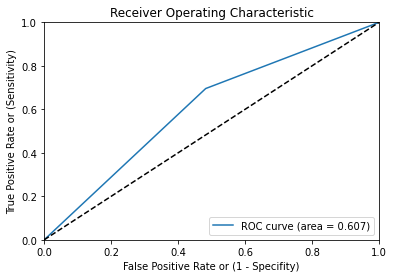

In [14]:
#Logistic Regression Score
k=166
cname= 'LogisticRegression'
fname= "RFE_" + str(k) + str(cname)+'_logreg'
precision_log,recall_log,roc_log,acu_log=predict_with_data(Xred,numres.loc[:,'DECEASED'],createLogisticRegression(),fname)
classifier_results(cname,precision_log,recall_log,roc_log,acu_log)

print('Logistic Regression')
print('Precision: ', precision_log) 
print('Recall: ', recall_log) 
print('ROC AUC Score: ', roc_log) 
print ('Accuracy: ', acu_log) 

SVC
---------
Precision:  0.6134453781512605
Recall:  0.7934782608695652
ROC AUC Score:  0.626150895140665
Accuracy:  0.632768361581921
---------


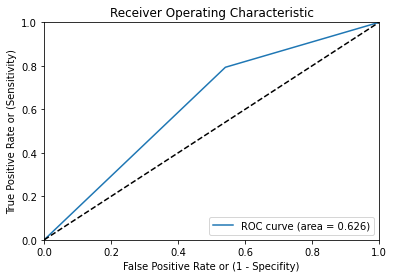

In [15]:
#SVC Score
k=136
cname= 'Support Vector Classifier'
fname= "RFE_" + str(k) + str(cname)+'_svc'
precision_svc,recall_svc,roc_svc,acu_svc=predict_with_data(Xred,numres.loc[:,'DECEASED'],createSVC(),fname)
classifier_results(cname,precision_log,recall_log,roc_log,acu_log)

print('SVC')
print('---------') 
print('Precision: ', precision_svc) 
print('Recall: ', recall_svc) 
print('ROC AUC Score: ', roc_svc) 
print ('Accuracy: ', acu_svc) 
print('---------')

RandomForest
---------
Precision:  0.6434782608695652
Recall:  0.8043478260869565
ROC AUC Score:  0.660997442455243
Accuracy:  0.6666666666666666
---------


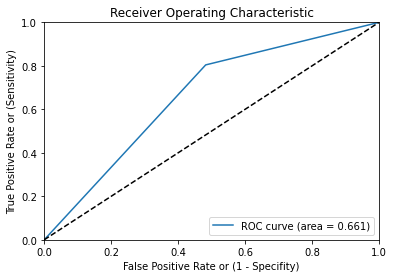

In [16]:
#Random Forest Classifier Score
cname= 'Random Forest'
fname= "RFE_" + str(826) + str(cname)+'_rf'
precision_rf,recall_rf,roc_rf,acu_rf=predict_with_data(Xred,numres.loc[:,'DECEASED'],
                                                       createRandomForestClassifier(),fname)
classifier_results(cname,precision_log,recall_log,roc_log,acu_log)


print('RandomForest')
print('---------') 
print('Precision: ', precision_rf) 
print('Recall: ', recall_rf) 
print('ROC AUC Score: ', roc_rf) 
print ('Accuracy: ', acu_rf) 
print('---------')